In [38]:
#Import Libraries
%pip install openpyxl
import openpyxl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%pip install seaborn
import seaborn as sns
import matplotlib.gridspec as gridspec
import os 
palettes = {'blue-black':'blend:#27c7d0,#000000', 'red-black':'blend:#f44336,#000000','red':'#f70707', 'blue':'#0737f7'}

In [41]:
DAPi = pd.read_csv("DAPi.csv")
mCherry = pd.read_csv("mCherry.csv")
Amyloid = pd.read_csv("Plaques.csv")
Colocalisation = pd.read_csv("Colocalisation.csv")
Area = pd.read_csv("Area.csv")
Distance = pd.read_csv("Distance.csv")
directory = 'Figures'
parent_dir = 'C:/Users/jamie/OneDrive - Imperial College London/Project'
path = os.path.join(parent_dir, directory) 
os.mkdir(path)
#DAPi.head()
#mCherry.head()
#Amyloid.head()
#Amyloid.isnull().values.any()
#Amyloid.iloc[304]
#Colocalisation.P1(30)
#print(Colocalisation.P1)

<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'C:/Users/jamie/OneDrive - Imperial College London/Project'

In [30]:
def getSCNandLabels(Cell, labels, name):
    Cell = Cell.replace(np.NaN,0)
    
    labels = labels.drop(columns=['XM', 'YM', 'Count'])
    SCN = 0
    Cell['SCN'] = 0
    labels['SCN'] = 0
    for i, count in enumerate(Cell.Count):
        if count == 1 or count == 0:
            SCN += 1
        Cell['SCN'][i] = SCN
    labels['SCN'] = [i+1 for i in range(labels['Label'].count())]
    Cell = pd.concat([Cell[['SCN']], Cell.drop(columns=['SCN'])], axis=1) 
    labels['Animal Name'] = [label.split('.')[0] for label in labels['Label']]
    labels['Condition'] = [''.join(filter(str.isalpha, name)) for name in labels['Animal Name']]
    labels['Width'] = [label.split('.')[1] for label in labels['Label']]
    labels['Height'] = [label.split('.')[2].split(':')[0] for label in labels['Label']]
    labels['X Factor'] = [800/int(width) for width in labels['Width']]
    labels['Y Factor'] = [500/int(height) for height in labels['Height']]
    labelled_cell = Cell.merge(labels, left_on='SCN', right_on='SCN')
    labelled_cell[f'{name} Volume'] = labelled_cell[['Volume (micron^3)']]
    labelled_cell[f'{name} Count'] = labelled_cell[['Count']]
    labelled_cell[f'{name} XM'] = labelled_cell['XM'] * labelled_cell['X Factor']
    labelled_cell[f'{name} YM'] = labelled_cell['YM'] * labelled_cell['Y Factor']
    labelled_cell = labelled_cell[['SCN', 'Animal Name', 'Condition', f'{name} Count', f'{name} Volume', f'{name} XM', f'{name} YM']]
    labelled_cell = labelled_cell.replace(np.NaN, 0)
    return labelled_cell
mCherry = getSCNandLabels(mCherry,Distance,'mCherry')
DAPi = getSCNandLabels(DAPi,Distance,'DAPi')
Amyloid = getSCNandLabels(Amyloid,Distance,'Aggregate')
#DAPi[DAPi['Animal Name'] == 'NLGF13'].head()
DAPi
#print(mCherry['SCN'])
#Amyloid.isnull().values.any()

<ipython-input-30-1337f3ff31d6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cell['SCN'][i] = SCN
<ipython-input-30-1337f3ff31d6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cell['SCN'][i] = SCN
<ipython-input-30-1337f3ff31d6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cell['SCN'][i] = SCN


,SCN,Animal Name,Condition,DAPi Count,DAPi Volume,DAPi XM,DAPi YM
0,1,hAPP2,hAPP,1.0,13520.062,263.816931,62.967000
1,1,hAPP2,hAPP,2.0,51.407,224.725926,14.287000
2,1,hAPP2,hAPP,3.0,62.302,59.742857,48.675000
3,1,hAPP2,hAPP,4.0,172.863,608.526984,62.932000
4,1,hAPP2,hAPP,5.0,329.344,682.828571,77.047000
...,...,...,...,...,...,...,...
7638,54,NLGF13,NLGF,251.0,28.084,117.089027,168.879144
7639,54,NLGF13,NLGF,252.0,20.821,5.280331,200.487569
7640,54,NLGF13,NLGF,253.0,44.386,70.891925,312.602901
7641,54,NLGF13,NLGF,254.0,18.884,51.324224,393.525552


In [31]:
def cleanAmyloid(rawAmyloid, rawColocalisation):
    rawColocalisation.drop(rawColocalisation[rawColocalisation.LabelObj == 255].index, inplace = True)
    rawColocalisation = rawColocalisation.reset_index()
    #CleanDF = rawAmyloid[['SCN', 'Animal Name', 'Condition', 'Aggregate Count','Aggregate Volume', 'Aggregate XM', 'Aggregate YM']]
    Combined = rawAmyloid.join(rawColocalisation['P1'])
    Combined['%Colocalisation'] = Combined['P1']
    Combined = Combined.drop(columns=['P1'])
    Combined = Combined.replace(np.NaN, 0)
    return Combined
Amyloid = cleanAmyloid(Amyloid, Colocalisation)
Amyloid.head()
Amyloid.isnull().values.any()

False

In [32]:
def getVolume(Area,labels):
    Volume = Area.Area * 13
    Volume = pd.DataFrame(Volume)
    Volume['SCN'] = [i+1 for i in range(Volume.Area.count())]
    Volume = Volume[['SCN', 'Area']]
    Volume = Volume.rename(columns={'SCN':'SCN', 'Area':'SCN Volume'})
    labels = labels.drop(columns=['XM', 'YM', 'Count'])
    labels['SCN'] = 0
    labels['SCN'] = [i+1 for i in range(labels['Label'].count())]
    labels['Animal Name'] = [label.split('.')[0] for label in labels['Label']]
    labels['Condition'] = [''.join(filter(str.isalpha, name)) for name in labels['Animal Name']]
    #print(labels)
    Volume = Volume.merge(labels, left_on='SCN', right_on='SCN')
    Volume = Volume[['SCN', 'Animal Name', 'Condition', 'SCN Volume']]
    return Volume
Volume = getVolume(Area,Distance)
#Volume.head()

In [33]:
from functools import reduce
CombinedDict = {'Amyloid': Amyloid, 'DAPi': DAPi, 'mCherry': mCherry, 'Volume': Volume}

def createSummary(attribute, data_dict):
    summary_dfs = []

    for data_type, data_df in data_dict.items():
        # Use regex to select columns not containing 'Count'
        mean_columns = data_df.filter(regex='^(?!.*Count).*').columns.tolist()
        mean_df = data_df.groupby(attribute)[mean_columns].mean()

        # Use regex to select columns containing 'Count'
        count_columns = data_df.filter(regex='Count').columns.tolist()
        count_df = data_df.groupby(attribute)[count_columns].count()

        # Drop 'SCN' column if needed
        mean_df = mean_df.drop('SCN', axis=1)
        #count_df = count_df.drop('SCN', axis=1)

        summary_dfs.append(mean_df)
        summary_dfs.append(count_df)
    print(summary_dfs)
    summary = reduce(lambda left, right: pd.merge(left, right, left_on=attribute, right_on=attribute), summary_dfs)
    return summary
#Summary_SCN = createSummary('SCN', CombinedDict)
#Summary_Condition = createSummary('Condition', CombinedDict)
Summary_Animal = createSummary('Animal Name', CombinedDict)
Summary_Animal.head(100)

<ipython-input-33-f64f1b05f7b5>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = data_df.groupby(attribute)[mean_columns].mean()
<ipython-input-33-f64f1b05f7b5>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = data_df.groupby(attribute)[mean_columns].mean()
<ipython-input-33-f64f1b05f7b5>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = data_df.groupby(attribute)[mean_columns].mean()
<

[             Aggregate Volume  Aggregate XM  Aggregate YM  %Colocalisation
Animal Name                                                               
NLGF11              75.862990    363.429852    190.200275         0.000000
NLGF12              90.204450    345.625813    153.896817         0.000000
NLGF13              46.221576    382.055066    197.489474         0.000000
NLGF7               49.389585    430.967024    205.846561        41.950244
NLGF9               53.077633    430.395741    248.241660        48.838667
Syn14                0.000000      0.000000      0.000000         0.000000
Syn15                0.000000      0.000000      0.000000         0.000000
Syn16                0.000000      0.000000      0.000000         0.000000
hAPP1               82.597093    278.051186    211.610528        46.087423
hAPP2               55.608894    280.504575    223.366883        46.076439
hAPP4               63.201733    356.147572    198.569737         2.365399
hAPP6               78.4

,Aggregate Volume,Aggregate XM,Aggregate YM,%Colocalisation,Aggregate Count,DAPi Volume,DAPi XM,DAPi YM,DAPi Count,mCherry Volume,mCherry XM,mCherry YM,mCherry Count,SCN Volume
Animal Name,,,,,,,,,,,,,,
NLGF11,75.862990,363.429852,190.200275,0.000000,99,216.802235,342.293026,254.942039,715,512.909794,367.666026,231.338467,499,474696.355250
NLGF12,90.204450,345.625813,153.896817,0.000000,40,136.791487,319.367951,274.822025,1234,895.919312,387.567043,245.875160,432,404457.128400
NLGF13,46.221576,382.055066,197.489474,0.000000,118,251.071428,352.535238,272.234851,355,1029.898723,330.473662,230.034083,404,439055.528600
NLGF7,49.389585,430.967024,205.846561,41.950244,41,70.659077,337.684327,228.887184,612,495.316015,370.985531,254.474103,452,318804.475167
NLGF9,53.077633,430.395741,248.241660,48.838667,30,45.531793,253.292907,238.330149,531,736.021537,326.267759,256.079480,417,443970.289750
Syn14,0.000000,0.000000,0.000000,0.000000,4,3710.664876,354.638141,256.858416,209,276.375041,296.372929,258.728330,266,389297.034750
Syn15,0.000000,0.000000,0.000000,0.000000,5,937.924182,366.419090,281.917151,975,348.754926,307.121794,250.160275,350,384883.683600
Syn16,0.000000,0.000000,0.000000,0.000000,3,192.843997,350.478607,237.158345,618,1744.207257,275.420304,239.209908,241,503171.543333
hAPP1,82.597093,278.051186,211.610528,46.087423,388,119.188673,303.235126,244.159867,608,207.720676,345.896730,242.876886,559,383017.579750


In [34]:
CombinedDictAmyloid = {'DAPi': DAPi, 'mCherry': mCherry, 'Volume': Volume}
def createCombinedAmyloid(amyloid, data_dict):
    #print(dfs)
    dfs = [amyloid]

    for data_type, data_df in data_dict.items():
        # Use regex to select columns not containing 'Count'
        mean_columns = data_df.filter(regex='^(?!.*Count).*').columns.tolist()
        mean_df = data_df.groupby('SCN')[mean_columns].mean()

        # Use regex to select columns containing 'Count'
        count_columns = data_df.filter(regex='Count').columns.tolist()
        count_df = data_df.groupby('SCN')[count_columns].count()

        # Drop 'SCN' column if needed
        mean_df = mean_df.drop('SCN', axis=1)
        #count_df = count_df.drop('SCN', axis=1)

        dfs.append(mean_df)
        dfs.append(count_df)

    combined = reduce(lambda left, right: pd.merge(left, right, left_on='SCN', right_on='SCN'), dfs)
    combined['Aggregate Density'] = combined['Aggregate Count'] * 1000000 / combined['SCN Volume']
    combined['DAPi Density'] = combined['DAPi Count'] * 1000000 / combined['SCN Volume']
    combined['mCherry Density'] = combined['mCherry Count'] * 1000000 / combined['SCN Volume']
    return combined

Combined_df = createCombinedAmyloid(Amyloid, CombinedDictAmyloid)
Combined_df.head()

<ipython-input-34-4fc862e71e8d>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = data_df.groupby('SCN')[mean_columns].mean()
<ipython-input-34-4fc862e71e8d>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = data_df.groupby('SCN')[mean_columns].mean()
<ipython-input-34-4fc862e71e8d>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = data_df.groupby('SCN')[mean_columns].mean()


,SCN,Animal Name,Condition,Aggregate Count,Aggregate Volume,Aggregate XM,Aggregate YM,%Colocalisation,DAPi Volume,DAPi XM,DAPi YM,DAPi Count,mCherry Volume,mCherry XM,mCherry YM,mCherry Count,SCN Volume,Aggregate Density,DAPi Density,mCherry Density
0,1,hAPP2,hAPP,1.0,187.632,136.157672,26.304,2.674,267.528459,381.377281,271.280851,181,328.453018,335.300922,235.785814,113,298942.085,3.345130,605.468447,377.999638
1,1,hAPP2,hAPP,2.0,18.077,90.037037,28.625,0.000,267.528459,381.377281,271.280851,181,328.453018,335.300922,235.785814,113,298942.085,6.690259,605.468447,377.999638
2,1,hAPP2,hAPP,3.0,50.842,575.024339,82.925,0.000,267.528459,381.377281,271.280851,181,328.453018,335.300922,235.785814,113,298942.085,10.035389,605.468447,377.999638
3,1,hAPP2,hAPP,4.0,21.467,495.906878,120.267,6.767,267.528459,381.377281,271.280851,181,328.453018,335.300922,235.785814,113,298942.085,13.380518,605.468447,377.999638
4,1,hAPP2,hAPP,5.0,18.400,361.023280,119.180,0.000,267.528459,381.377281,271.280851,181,328.453018,335.300922,235.785814,113,298942.085,16.725648,605.468447,377.999638


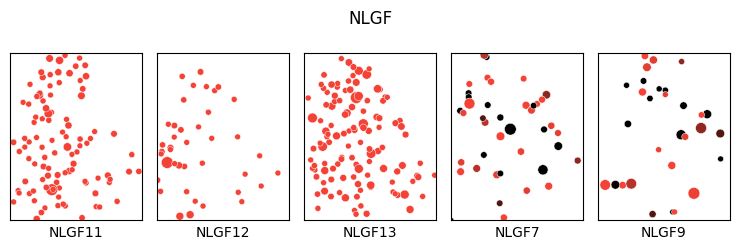

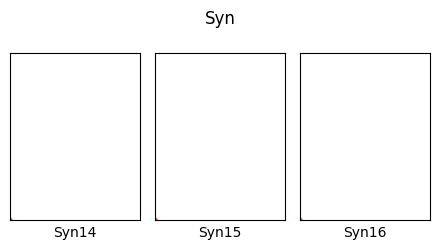

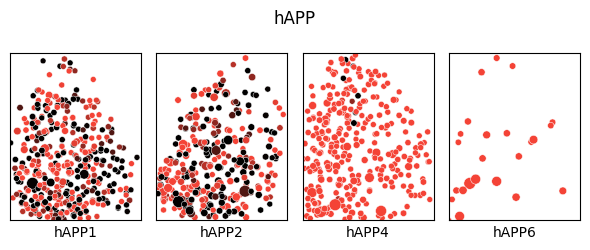

In [35]:
def location_tick_params(location_ax): 
    location_ax.tick_params(axis='both',which='both',bottom=False, top=False,left=False, right=False,labelbottom=False,labelleft=False)   
def aggregateLocations(aggregate_df):
    condition_list = aggregate_df['Condition'].unique()    
    for condition in condition_list:
        condition_df = aggregate_df[aggregate_df['Condition'] == condition]
        animal_list = condition_df['Animal Name'].unique()
        #print(attribute_list)
        fig, axes = plt.subplots(1, len(animal_list), figsize=(1.5*len(animal_list), 2.5))
        for i, ax in enumerate(axes.flatten()):
            df_attribute = aggregate_df[aggregate_df['Animal Name'] == animal_list[i]]
            #print(df_attribute['Aggregate XM'])
    
            sns.scatterplot(y='Aggregate XM', x='Aggregate YM', hue='%Colocalisation', size='Aggregate Volume', data=df_attribute, ax=ax, palette = palettes['red-black'])
            #ax.set_title(animal_list[i], loc='Center')
            ax.set_xlim(xmin=0, xmax=500)
            ax.set_ylim(ymin=0, ymax=800)
            plt.yticks(visible=False)
            ax.set(ylabel=None, xlabel=animal_list[i])
            ax.legend().set_visible(False)
            location_tick_params(ax)
        fig.suptitle(condition)
        plt.tight_layout()
        plt.show()
        fig.savefig(f'Aggregate Locations {condition}')
#aggregateLocations(Amyloid, 'SCN')
aggregateLocations(Amyloid.sort_values(by=['Animal Name']))

In [42]:
def aggregateCherryLocations(raw_aggregate_df, raw_mCherry_df, raw_summary_df):
    aggregate_df = raw_aggregate_df.drop(raw_aggregate_df[raw_aggregate_df['Condition'] == 'Syn'].index)
    mCherry_df = raw_mCherry_df.drop(raw_mCherry_df[raw_mCherry_df['Condition'] == 'Syn'].index)
    summary_df = raw_summary_df[~raw_summary_df.index.str.contains('syn', case=False, na=False)]
    aggregate_condition_list = aggregate_df['Condition'].unique()
    #print(attribute_list)
    for condition_name in aggregate_condition_list:
        aggregate_condition_df = aggregate_df[aggregate_df['Condition'] == condition_name]
        mCherry_condition_df = mCherry_df[mCherry_df['Condition'] == condition_name]
        #print(aggregate_condition_df)
        aggregate_animal_list = aggregate_condition_df['Animal Name'].unique()
        mCherry_animal_list = mCherry_condition_df['Animal Name'].unique()
        for i, animal_name in enumerate(aggregate_animal_list):
            animal_fig, animal_ax = plt.subplots(1, 3, figsize=(7, 3))
            aggregate_animal_df = aggregate_condition_df[aggregate_condition_df['Animal Name'] == animal_name]
            mCherry_animal_df = mCherry_condition_df[mCherry_condition_df['Animal Name'] == animal_name]
            summary_animal_df = summary_df.loc[[animal_name]]
            #print(mCherry_animal_df['mCherry XM'].mean())
            #print(animal_summary_df.loc[[animal_name]][['Aggregate Count']])
            #print(aggregate_animal_df)
            sns.scatterplot(y='mCherry XM', x='mCherry YM', size='mCherry Volume', data=mCherry_animal_df, ax=animal_ax[0], color=palettes['blue'])
            animal_ax[0].plot(mCherry_animal_df['mCherry YM'].mean(), mCherry_animal_df['mCherry XM'].mean(), "+", mew=3, ms=10, color='black')
            #plt.plot(200, 200, "b+", mew=10, ms=200)
            sns.scatterplot(y='Aggregate XM', x='Aggregate YM', size='Aggregate Volume', data=aggregate_animal_df, ax=animal_ax[1], color = palettes['red'])
            animal_ax[1].plot(aggregate_animal_df['Aggregate YM'].mean(), aggregate_animal_df['Aggregate XM'].mean(), "+", mew=3, ms=10, color='black')
            bar1 = animal_ax[2].bar(x=150, width=100, height=summary_animal_df['mCherry Count'], color=palettes['blue'])
            bar2 = animal_ax[2].bar(x=350, width=100, height=summary_animal_df['Aggregate Count'], color=palettes['red'])
            #animal_ax[2].plot(150, Summary_Animal['mCherry Count'].mean(), '_', mew=3, ms=40, color='black')
            animal_ax[2].plot([80,220], [summary_df['mCherry Count'].mean(), summary_df['mCherry Count'].mean()], ls='dashed', color='black')
            animal_ax[2].plot([280,420], [summary_df['Aggregate Count'].mean(), summary_df['Aggregate Count'].mean()], ls='dashed', color='black')
            animal_ax[2].annotate(str(int(summary_animal_df.iloc[0]['mCherry Count'])),(120,summary_animal_df['mCherry Count'])) 
            animal_ax[2].annotate(str(int(summary_animal_df.iloc[0]['Aggregate Count'])),(320,summary_animal_df['Aggregate Count'])) 
            xlabels = ['mCherry', 'Aggregates', 'Counts']
            for j, ax in enumerate(animal_ax):
                ax.set_xlim(xmin=0, xmax=500)
                ax.set_ylim(ymin=0, ymax=800)
                ax.legend().set_visible(False)
                ax.set(ylabel=None, xlabel=None)
                location_tick_params(ax)
                if i == 0:
                    ax.set_title(xlabels[j])
            animal_ax[2].set_ylim(ymin=0, ymax=650)
            

            animal_ax[2].legend(handles = [bar1,bar2],labels=['mCherry', 'Aggregates'], fontsize=6).set_visible(True)
            animal_fig.subplots_adjust(wspace=0)
            animal_fig.supylabel(animal_name, horizontalalignment='left')
            #plt.tight_layout()
        plt.show()
aggregateCherryLocations(Amyloid, mCherry, Summary_Animal)

<class 'KeyError'>: 'Condition'

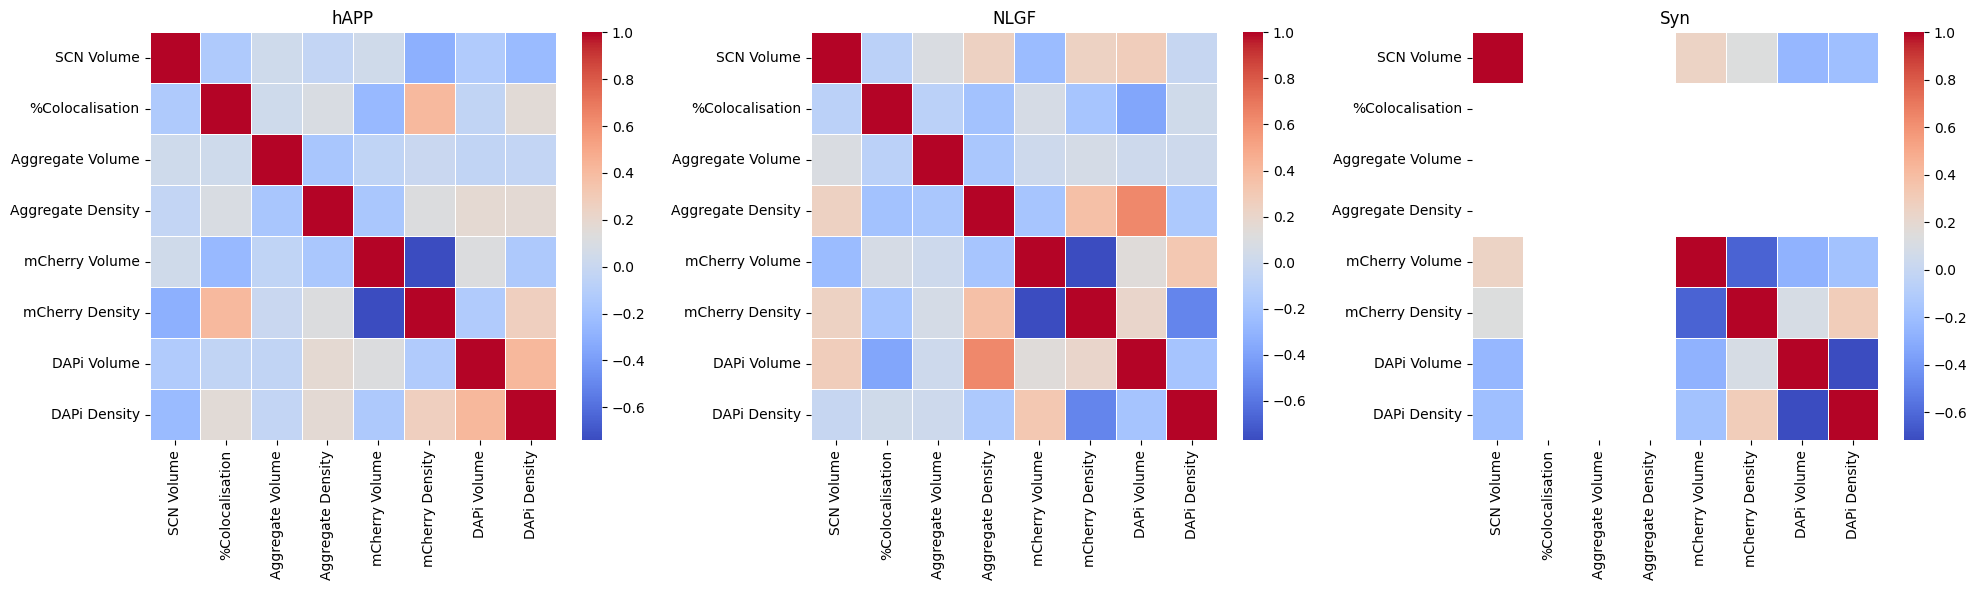

,SCN,Animal Name,Condition,Aggregate Count,Aggregate Volume,Aggregate XM,Aggregate YM,%Colocalisation,DAPi Volume,DAPi XM,DAPi YM,DAPi Count,mCherry Volume,mCherry XM,mCherry YM,mCherry Count,SCN Volume,Aggregate Density,DAPi Density,mCherry Density
0,1,hAPP2,hAPP,1.0,187.632,136.157672,26.304,2.674,267.528459,381.377281,271.280851,181,328.453018,335.300922,235.785814,113,298942.085,3.345130,605.468447,377.999638
1,1,hAPP2,hAPP,2.0,18.077,90.037037,28.625,0.000,267.528459,381.377281,271.280851,181,328.453018,335.300922,235.785814,113,298942.085,6.690259,605.468447,377.999638
2,1,hAPP2,hAPP,3.0,50.842,575.024339,82.925,0.000,267.528459,381.377281,271.280851,181,328.453018,335.300922,235.785814,113,298942.085,10.035389,605.468447,377.999638
3,1,hAPP2,hAPP,4.0,21.467,495.906878,120.267,6.767,267.528459,381.377281,271.280851,181,328.453018,335.300922,235.785814,113,298942.085,13.380518,605.468447,377.999638
4,1,hAPP2,hAPP,5.0,18.400,361.023280,119.180,0.000,267.528459,381.377281,271.280851,181,328.453018,335.300922,235.785814,113,298942.085,16.725648,605.468447,377.999638


In [300]:
def createMatrices(matrix_df, attribute, to_drop):
    #to_drop = ['SCN','XM','YM','Adjusted X', 'Adjusted Y','SCN XM','SCN YM','Animal Number','Animal Number','Image Width','Image Height','DAPi Count','DAPi Total Area','DAPi %Area','mCherry Count','mCherry Total Area','mCherry %Area',]
    #df = df_MatrixCondition.drop(to_drop, axis=1)
    #df = df.replace(np.NaN, 0)
    summary_matrix = matrix_df.drop(columns=to_drop, axis=1)
    attribute_list = summary_matrix[attribute].unique()
    fig, axes = plt.subplots(1, len(attribute_list), figsize=(20, 6))
    for i, ax in enumerate(axes.flatten()):
        isummary_matrix = summary_matrix[summary_matrix[attribute] == attribute_list[i]]
        isummary_matrix = isummary_matrix[['SCN Volume', '%Colocalisation', 'Aggregate Volume', 'Aggregate Density', 'mCherry Volume', 'mCherry Density', 'DAPi Volume', 'DAPi Density']] 
        correlation_matrix = isummary_matrix.corr()
        sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax)
        ax.set_title(attribute_list[i], loc='Center')
    plt.tight_layout()
    plt.show()
    fig.savefig(f'Matrices grouped by {attribute}')
#createMatrices(Summary_Condition)
#createMatrices(Summary_Animal)
ToDrop = Combined_df.filter(regex='Count').columns.tolist()
[ToDrop.append(column) for column in Combined_df.filter(regex='XM').columns.tolist()]
[ToDrop.append(column) for column in Combined_df.filter(regex='YM').columns.tolist()]
#[ToDrop.append(column) for column in Combined_df.filter(regex='Volume').columns.tolist()]
ToDrop.append('SCN')
createMatrices(Combined_df,'Condition', ToDrop)
#Combined_df.head()
